In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [2]:
# reading the data
df =pd.read_csv('day.csv')
df.shape

(730, 16)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# the data does not have any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# dropping the columns which are insignificant, casual and registered are part of target
df.drop(columns=['casual','registered','instant','dteday'], inplace=True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis - Continous Variables

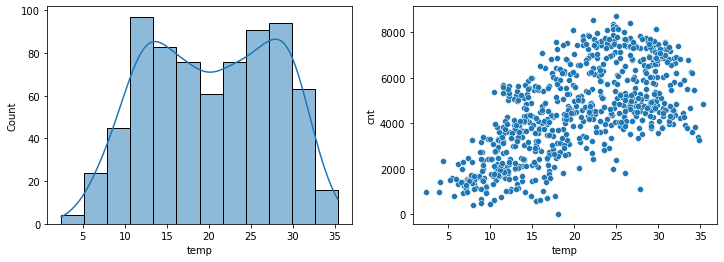

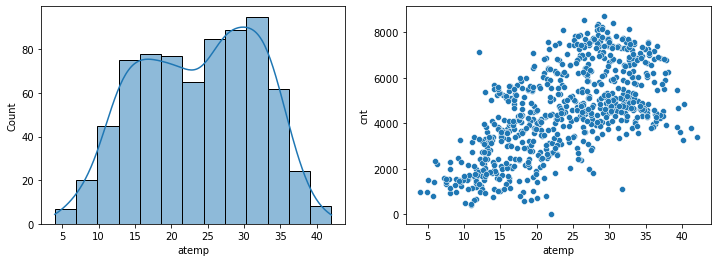

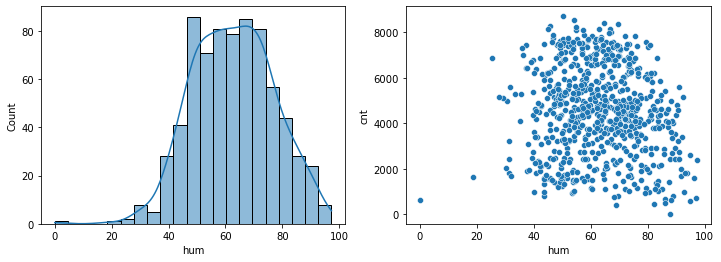

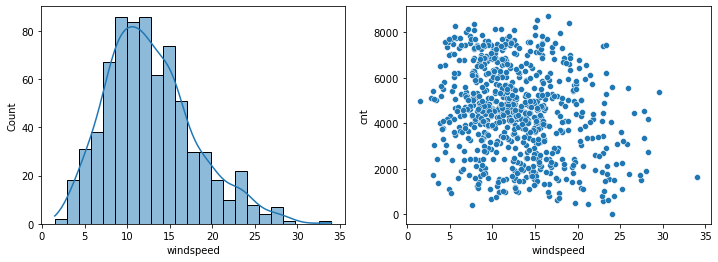

In [7]:
cont_vars=['temp','atemp','hum','windspeed']
for i in cont_vars:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[i],kde=True)
    plt.subplot(1,2,2)
    sns.scatterplot(x=i,y='cnt',data=df)
    plt.show()

### Insights 

- temp and atemp have very similar distributions and have strong correlation with the target
- humidity and windspeed do not have any visible correlation with the target

#### Univariate Analysis - categorical variables

In [8]:
## taking categorical and boolean features
cat_vars =['yr','mnth','season','weekday','holiday','workingday','weathersit']

In [9]:
# replacing the features based on data dictionary
df['season'] =df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})
df['weathersit']=df['weathersit'].replace({1:'clear',2:'mist',3:'light_raim',4:'thunderstorm'})
df['yr']=df['yr'].replace({0:2018,1:2019})

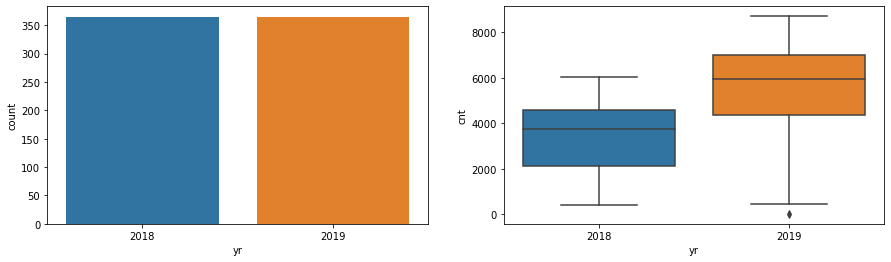

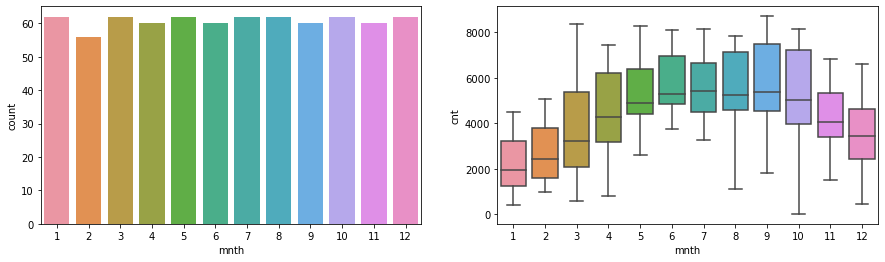

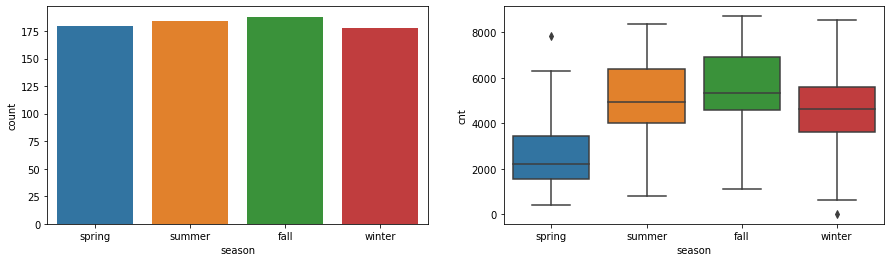

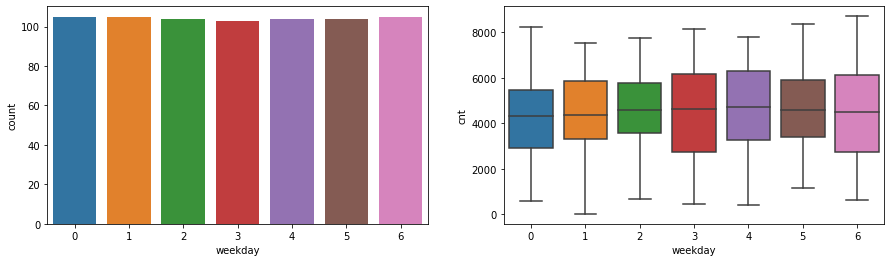

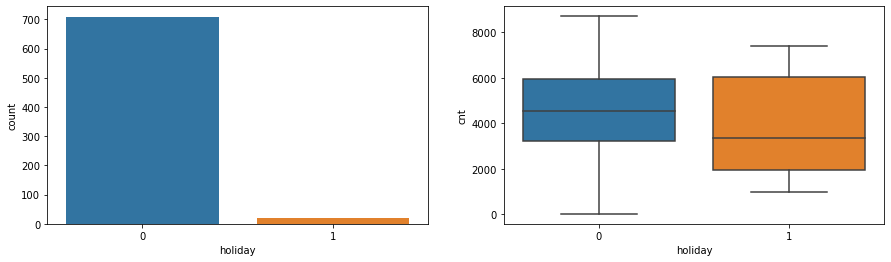

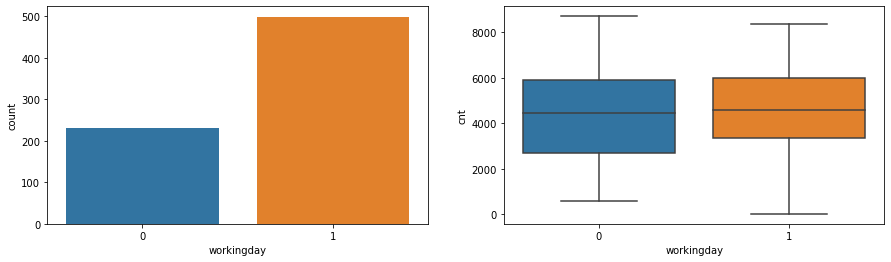

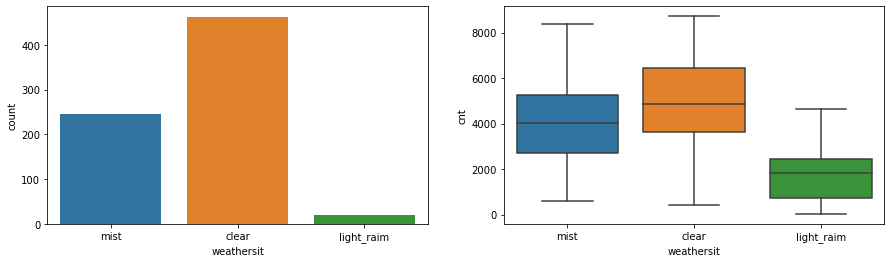

In [10]:
for i in cat_vars:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.countplot(df[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=i,y='cnt',data=df)
    plt.show()

### Insights

- year: year 2019 have much visibly higher demand as compared to 2018, the demand is increasing over the years
- month: there's a pattern in months as well, summer months have higher demand as compared to winter months
- season: visible pattern in seasons, spring has very low demand, followed by winter and summer and falling have high demands
- weekday: no signigicant pattern
- holiday: days with holidays have slightly lower demand as compared to non holidays
- workingday: no significant difference in demand
- weather: there's 0 demand if there's heavy rain or thunderstorm, also clear weather sees high demand followed by mist and low demand for light rain

### Bivariate Analysis

#### Pairplot

<Figure size 720x432 with 0 Axes>

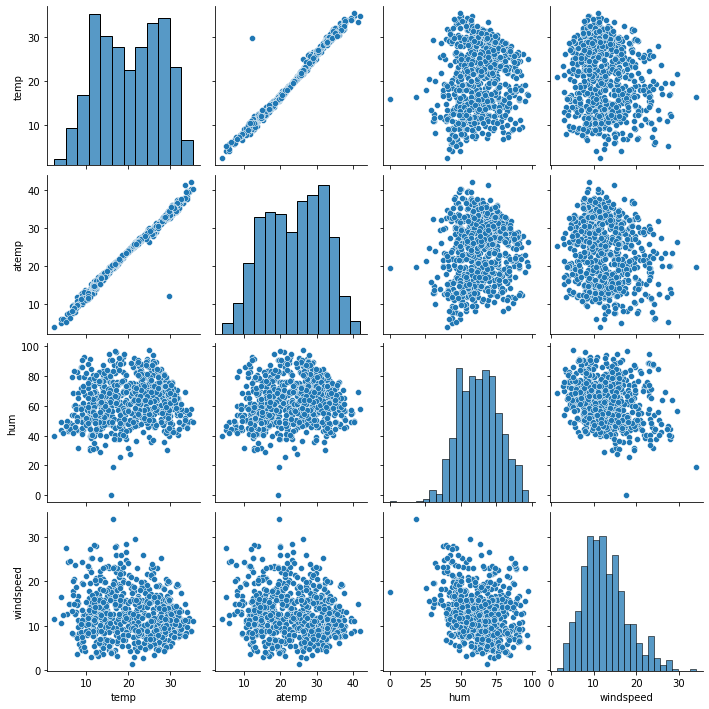

In [11]:
plt.figure(figsize=(10,6))
sns.pairplot(df[cont_vars])

#### Heatmap

<AxesSubplot:>

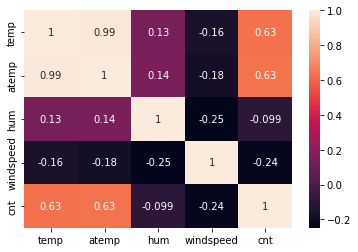

In [12]:
sns.heatmap(df[cont_vars+['cnt']].corr(),annot=True)

- temp and atemp are highly correlated, need to drop one variable
- based on domain knowledge, atemp should be more important then temp, hence dropping temp

In [13]:
df.drop(columns='temp', inplace=True)

#### VIF - Checking Group multicollinearity

In [14]:
df_cont =df[['atemp','hum','windspeed']]
vif =pd.DataFrame()
vif['Features'] =df_cont.columns
vif['VIF'] =[variance_inflation_factor(df_cont.values,i) for i in range(df_cont.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(by ='VIF', inplace =True, ascending=False)
vif

,Features,VIF
1,hum,9.74
0,atemp,7.93
2,windspeed,4.68


- All the VIF values are below 10, hence can keep them all
- Also keeping hum and windspeed columns to check their importance

### Feature Engineering

In [15]:
# One feature we can create is by combining year and season to see their combined effect
df['year_season'] =df['yr'].astype('str')+'_'+df['season']

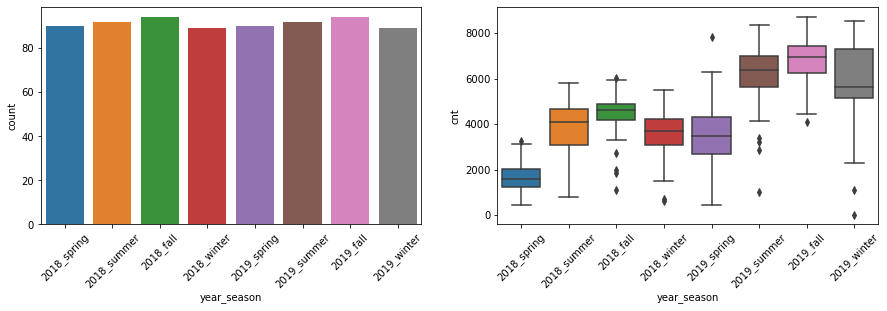

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(df['year_season'])
plt.xticks(rotation =45)
plt.subplot(1,2,2)
sns.boxplot(x='year_season',y='cnt',data=df)
plt.xticks(rotation =45)
plt.show()

- The seasonality in demand and year over year growth is very well captured with year-season
- Can drop the year and season columns

In [17]:
df.drop(columns =['yr','season'], inplace =True)

### Creating dummy variables

In [18]:
# creating dummy variables for categorical features while dropping first 
dummy_vars =['weekday','weathersit','year_season','mnth']
data_df = pd.get_dummies(df,columns=dummy_vars,drop_first=True)
data_df.shape

(730, 32)

In [19]:
data_df.head()

,holiday,workingday,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_raim,weathersit_mist,year_season_2018_spring,year_season_2018_summer,year_season_2018_winter,year_season_2019_fall,year_season_2019_spring,year_season_2019_summer,year_season_2019_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### train- test split

In [20]:
y= data_df.pop('cnt')
X =data_df

In [21]:
# splitting train and test data into 80-20 ratio
X_train, X_test,y_train,y_test =train_test_split(X,y, random_state =47, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 31), (146, 31), (584,), (146,))

### Scaling the Training data

In [22]:
## Applying standardization - to keep the distribution of features intact

# scaling numerical variables
scale_vars =['atemp','hum','windspeed']
scaler =StandardScaler()

X_train[scale_vars]=scaler.fit_transform(X_train[scale_vars]) 

In [23]:
X_train.head()

,holiday,workingday,atemp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_raim,weathersit_mist,year_season_2018_spring,year_season_2018_summer,year_season_2018_winter,year_season_2019_fall,year_season_2019_spring,year_season_2019_summer,year_season_2019_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
326,0,1,-0.237424,0.948362,1.834064,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
649,0,1,-0.221802,-0.593388,0.550263,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
172,0,1,1.385696,0.593023,-0.250480,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
139,0,1,0.369832,0.678184,-0.852649,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
728,0,0,-1.463197,-0.986907,2.024328,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Building Baseline Model

In [24]:
# Building baseline model using statsmodel library
X_train_constant =sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_constant)
lr =model.fit()

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.76e-207
Time:                        00:38:14   Log-Likelihood:                -4689.4
No. Observations:                 584   AIC:                             9441.
Df Residuals:                     553   BIC:                             9576.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2911.9168    292.962      9.940      0.000    2336.463    3487.371
holiday                  -384.8962    182.665     -2.107      0.036    -743.699     -26.094
workingday                321.7189     74.681      4.308      0.000     175.026     468.411
atemp                     836.9500     79.179     10.570      0.000     681.422     992.478
hum                      -244.4095     48.203     -5.070      0.000    -339.093    -149.726
windspeed                -232.6365     35.289     -6.592      0.000    -301.954    -163.319
weekday_1                -131.4978     80.809     -1.627      0.104    -290.228      27.232
weekday_2                 -74.7915     85.645     -0.873      0.383    -243.020      93.437
weekday_3                  38.9170     84.972      0.458      0.647    -127.990     205.824
weekday_4                  18.7327     86.892      0.216      0.829    -151.947     189.412
weekday_5                  85.4623     84.942      1.006      0.315     -81.386     252.310
weekday_6                 513.6335    120.893      4.249      0.000     276.169     751.099
weathersit_light_raim   -1925.4967    251.630     -7.652      0.000   -2419.764   -1431.230
weathersit_mist          -340.0149     87.950     -3.866      0.000    -512.772    -167.258
year_season_2018_spring  -535.0879    254.318     -2.104      0.036   -1034.635     -35.541
year_season_2018_summer    41.3563    225.598      0.183      0.855    -401.778     484.490
year_season_2018_winter   731.9358    234.447      3.122      0.002     271.420    1192.451
year_season_2019_fall    2288.7083    126.885     18.038      0.000    2039.473    2537.944
year_season_2019_spring  1205.7935    252.078      4.783      0.000     710.646    1700.941
year_season_2019_summer  2248.4896    226.915      9.909      0.000    1802.768    2694.211
year_season_2019_winter  2715.7979    236.318     11.492      0.000    2251.607    3179.989
mnth_2                    141.7099    156.777      0.904      0.366    -166.241     449.660
mnth_3                    653.8635    176.936      3.695      0.000     306.315    1001.412
mnth_4                    454.8221    267.354      1.701      0.089     -70.331     979.975
mnth_5                    728.7472    291.676      2.498      0.013     155.819    1301.676
mnth_6                    608.5676    304.384      1.999      0.046      10.677    1206.458
mnth_7                     30.6413    344.459      0.089      0.929    -645.967     707.250
mnth_8                    517.5899    327.972      1.578      0.115    -126.634    1161.814
mnth_9                   1044.2506    290.790      3.591      0.000     473.063    1615.438
mnth_10                   645.6768    272.064      2.373      0.018     111.271    1180.083
mnth_11                     5.0252    254.853  

### Checking VIF factor for all the variables

In [26]:
vif =pd.DataFrame()
vif['Features'] =X_train.columns
vif['VIF'] =[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(by ='VIF', inplace =True, ascending=False)
vif

,Features,VIF
0,holiday,inf
5,weekday_1,inf
6,weekday_2,inf
7,weekday_3,inf
8,weekday_4,inf
9,weekday_5,inf
1,workingday,inf
2,atemp,5.79
19,year_season_2019_winter,5.08
18,year_season_2019_summer,4.90


### Insights

- The R-squared and adjusted R-squared values are quite good though there are lot of features with high p-value, hence need to be removed
- lot of features have infinite vif value, meaning they are redundant

### Feature Reduction

Reducing features iteratively, using 0.05 as the threshold for p_value

#### removing variables with high p-value and high VIF

- removing weekday_4, p_value =0.955

In [27]:
X_train.drop(columns='weekday_4', inplace=True)

X_train_constant =sm.add_constant(X_train)

model=sm.OLS(y_train,X_train_constant)

lr =model.fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.76e-207
Time:                        00:38:17   Log-Likelihood:                -4689.4
No. Observations:                 584   AIC:                             9441.
Df Residuals:                     553   BIC:                             9576.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2911.9168    292.962      9.940      0.000    2336.463    3487.371
holiday                  -366.1635    234.234     -1.563      0.119    -826.262      93.935
workingday                340.4516    121.365      2.805      0.005     102.058     578.845
atemp                     836.9500     79.179     10.570      0.000     681.422     992.478
hum                      -244.4095     48.203     -5.070      0.000    -339.093    -149.726
windspeed                -232.6365     35.289     -6.592      0.000    -301.954    -163.319
weekday_1                -150.2306    123.733     -1.214      0.225    -393.275      92.814
weekday_2                 -93.5242    119.886     -0.780      0.436    -329.011     141.963
weekday_3                  20.1842    119.339      0.169      0.866    -214.228     254.597
weekday_5                  66.7296    118.857      0.561      0.575    -166.737     300.196
weekday_6                 513.6335    120.893      4.249      0.000     276.169     751.099
weathersit_light_raim   -1925.4967    251.630     -7.652      0.000   -2419.764   -1431.230
weathersit_mist          -340.0149     87.950     -3.866      0.000    -512.772    -167.258
year_season_2018_spring  -535.0879    254.318     -2.104      0.036   -1034.635     -35.541
year_season_2018_summer    41.3563    225.598      0.183      0.855    -401.778     484.490
year_season_2018_winter   731.9358    234.447      3.122      0.002     271.420    1192.451
year_season_2019_fall    2288.7083    126.885     18.038      0.000    2039.473    2537.944
year_season_2019_spring  1205.7935    252.078      4.783      0.000     710.646    1700.941
year_season_2019_summer  2248.4896    226.915      9.909      0.000    1802.768    2694.211
year_season_2019_winter  2715.7979    236.318     11.492      0.000    2251.607    3179.989
mnth_2                    141.7099    156.777      0.904      0.366    -166.241     449.660
mnth_3                    653.8635    176.936      3.695      0.000     306.315    1001.412
mnth_4                    454.8221    267.354      1.701      0.089     -70.331     979.975
mnth_5                    728.7472    291.676      2.498      0.013     155.819    1301.676
mnth_6                    608.5676    304.384      1.999      0.046      10.677    1206.458
mnth_7                     30.6413    344.459      0.089      0.929    -645.967     707.250
mnth_8                    517.5899    327.972      1.578      0.115    -126.634    1161.814
mnth_9                   1044.2506    290.790      3.591      0.000     473.063    1615.438
mnth_10                   645.6768    272.064      2.373      0.018     111.271    1180.083
mnth_11                     5.0252    254.853      0.020      0.984    -495.573     505.624
mnth_12                    22.0170    201.445  

In [28]:
vif =pd.DataFrame()
vif['Features'] =X_train.columns
vif['VIF'] =[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(by ='VIF', inplace =True, ascending=False)
vif

,Features,VIF
1,workingday,9.62
2,atemp,5.79
18,year_season_2019_winter,5.08
17,year_season_2019_summer,4.90
13,year_season_2018_summer,4.88
14,year_season_2018_winter,4.77
22,mnth_5,4.45
21,mnth_4,4.09
28,mnth_11,4.06
27,mnth_10,3.98


#### Insights
- No change in the R-squared or adjusted R-squared value 
- All the vif factor values are below 10
- There are still many features with p_value greater than 0.05, removing them one by one

In [29]:
# Further removing feature mnth_7 based on high p_value= 0.991

X_train.drop(columns='mnth_7', inplace=True)

X_train_constant =sm.add_constant(X_train)

model=sm.OLS(y_train,X_train_constant)

lr =model.fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     109.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.67e-208
Time:                        00:38:19   Log-Likelihood:                -4689.4
No. Observations:                 584   AIC:                             9439.
Df Residuals:                     554   BIC:                             9570.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2933.6946    160.760     18.249      0.000    2617.920    3249.469
holiday                  -367.1318    233.772     -1.570      0.117    -826.319      92.056
workingday                339.5308    120.815      2.810      0.005     102.220     576.842
atemp                     841.0157     64.598     13.019      0.000     714.129     967.902
hum                      -245.0421     47.633     -5.144      0.000    -338.606    -151.478
windspeed                -232.7095     35.248     -6.602      0.000    -301.946    -163.473
weekday_1                -149.6273    123.437     -1.212      0.226    -392.088      92.834
weekday_2                 -93.1787    119.715     -0.778      0.437    -328.330     141.973
weekday_3                  20.5754    119.151      0.173      0.863    -213.467     254.618
weekday_5                  67.6848    118.265      0.572      0.567    -164.617     299.987
weekday_6                 513.5052    120.776      4.252      0.000     276.271     750.740
weathersit_light_raim   -1923.5043    250.406     -7.682      0.000   -2415.367   -1431.642
weathersit_mist          -339.4483     87.641     -3.873      0.000    -511.597    -167.300
year_season_2018_spring  -547.6971    210.962     -2.596      0.010    -962.081    -133.313
year_season_2018_summer    35.0432    213.953      0.164      0.870    -385.214     455.301
year_season_2018_winter   724.3932    218.381      3.317      0.001     295.437    1153.349
year_season_2019_fall    2288.8754    126.758     18.057      0.000    2039.891    2537.860
year_season_2019_spring  1191.9055    197.734      6.028      0.000     803.506    1580.305
year_season_2019_summer  2241.3559    212.082     10.568      0.000    1824.773    2657.939
year_season_2019_winter  2708.2734    220.463     12.284      0.000    2275.227    3141.319
mnth_2                    137.2631    148.460      0.925      0.356    -154.350     428.876
mnth_3                    645.3788    148.892      4.335      0.000     352.916     937.841
mnth_4                    440.2013    210.673      2.089      0.037      26.385     854.018
mnth_5                    711.6058    218.762      3.253      0.001     281.901    1141.310
mnth_6                    586.9959    183.799      3.194      0.001     225.969     948.023
mnth_8                    491.4843    146.296      3.360      0.001     204.121     778.847
mnth_9                   1022.5488    158.098      6.468      0.000     712.004    1333.094
mnth_10                   631.5823    220.967      2.858      0.004     197.546    1065.619
mnth_11                    -6.5607    218.862     -0.030      0.976    -436.461     423.340
mnth_12                    13.4319    176.662      0.076      0.939    -333.578     360.441
===============================================

### Note:

- This process is repeated to remove the variables have p-value >0.05 one by one iteratively
- Until all the variables have acceptable p-value and there's no significant decrease in the adjusted r-squared value
- To keep the  notebook concise and readable, removing the features together

In [30]:
## Removed variables based on p-value

feat_dropped_p_val =['weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'year_season_2018_summer',
 'mnth_2',
 'mnth_7',
 'mnth_11',
 'mnth_12']

len(feat_dropped_p_val)

10

In [31]:
final_cols =[i for i in X_train.columns if i not in feat_dropped_p_val]

In [32]:
X_train =X_train[final_cols]

In [33]:
## Summary after removing variables
X_train_constant =sm.add_constant(X_train)

model=sm.OLS(y_train,X_train_constant)

lr =model.fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     152.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          7.54e-216
Time:                        00:38:21   Log-Likelihood:                -4692.2
No. Observations:                 584   AIC:                             9428.
Df Residuals:                     562   BIC:                             9525.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2950.2585    142.779     20.663      0.000    2669.813    3230.704
holiday                  -484.1848    209.955     -2.306      0.021    -896.577     -71.792
workingday                314.5460     92.427      3.403      0.001     133.002     496.090
atemp                     837.5905     58.294     14.368      0.000     723.090     952.091
hum                      -253.4690     46.679     -5.430      0.000    -345.156    -161.782
windspeed                -235.9878     35.019     -6.739      0.000    -304.773    -167.203
weekday_6                 511.7714    120.423      4.250      0.000     275.238     748.305
weathersit_light_raim   -1903.5554    248.499     -7.660      0.000   -2391.656   -1415.455
weathersit_mist          -325.9524     86.763     -3.757      0.000    -496.371    -155.534
year_season_2018_spring  -522.7060    172.376     -3.032      0.003    -861.285    -184.127
year_season_2018_winter   706.8938    160.395      4.407      0.000     391.847    1021.941
year_season_2019_fall    2281.2498    121.921     18.711      0.000    2041.773    2520.726
year_season_2019_spring  1220.6243    160.042      7.627      0.000     906.271    1534.978
year_season_2019_summer  2214.2304    121.668     18.199      0.000    1975.252    2453.209
year_season_2019_winter  2688.2106    161.650     16.630      0.000    2370.700    3005.722
mnth_3                    612.6739    123.540      4.959      0.000     370.018     855.329
mnth_4                    452.0021    163.248      2.769      0.006     131.351     772.653
mnth_5                    724.5090    163.701      4.426      0.000     402.969    1046.049
mnth_6                    580.9827    154.030      3.772      0.000     278.438     883.527
mnth_8                    474.2841    142.317      3.333      0.001     194.746     753.822
mnth_9                   1014.7415    139.580      7.270      0.000     740.580    1288.903
mnth_10                   630.1887    145.233      4.339      0.000     344.923     915.455
==============================================================================
Omnibus:                      109.162   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.548
Skew:                          -0.876   Prob(JB):                     4.14e-75
Kurtosis:                       6.317   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Vif factors

vif =pd.DataFrame()
vif['Features'] =X_train.columns
vif['VIF'] =[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(by ='VIF', inplace =True, ascending=False)
vif

,Features,VIF
1,workingday,4.28
2,atemp,3.06
7,weathersit_mist,2.45
8,year_season_2018_spring,2.41
3,hum,2.10
11,year_season_2019_spring,2.08
13,year_season_2019_winter,2.01
9,year_season_2018_winter,1.89
12,year_season_2019_summer,1.84
15,mnth_4,1.68


- The adjusted R-sqaured value has increased slightly after removing the features, meaning the feature reduction has been done right
- All the features have acceptable p-value now
- Still there are more number of features, further reducing features based on RFE

### Removing the features using RFE

In [35]:
## Taking top 15 features only
rfe = RFE(estimator=LinearRegression()  ,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [36]:
X_train.columns[(rfe.get_support())]

Index(['holiday', 'atemp', 'weathersit_light_raim', 'weathersit_mist',
       'year_season_2018_spring', 'year_season_2018_winter',
       'year_season_2019_fall', 'year_season_2019_spring',
       'year_season_2019_summer', 'year_season_2019_winter', 'mnth_3',
       'mnth_5', 'mnth_6', 'mnth_9', 'mnth_10'],
      dtype='object')

In [37]:
rfe.ranking_

array([1, 4, 1, 6, 7, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1])

In [38]:
### keeping the 15 features based on RFE

final_features =X_train.columns[(rfe.get_support())]

In [39]:
X_train =X_train[final_features]
X_train.shape

(584, 15)

In [40]:
## Final Summary
X_train_constant =sm.add_constant(X_train)

model=sm.OLS(y_train,X_train_constant)

lr =model.fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          8.81e-205
Time:                        00:38:29   Log-Likelihood:                -4734.8
No. Observations:                 584   AIC:                             9502.
Df Residuals:                     568   BIC:                             9571.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3644.8239     90.028     40.486      0.000    3467.996    3821.652
holiday                  -786.3533    207.942     -3.782      0.000   -1194.782    -377.925
atemp                     807.9222     57.623     14.021      0.000     694.742     921.102
weathersit_light_raim   -2655.3989    233.531    -11.371      0.000   -3114.088   -2196.710
weathersit_mist          -597.2716     72.761     -8.209      0.000    -740.184    -454.359
year_season_2018_spring  -798.2298    158.959     -5.022      0.000   -1110.449    -486.010
year_season_2018_winter   447.3886    146.186      3.060      0.002     160.258     734.519
year_season_2019_fall    2297.7501    124.692     18.427      0.000    2052.837    2542.663
year_season_2019_spring   946.7190    147.590      6.415      0.000     656.829    1236.609
year_season_2019_summer  2303.9566    123.414     18.669      0.000    2061.553    2546.360
year_season_2019_winter  2474.5066    148.453     16.669      0.000    2182.924    2766.090
mnth_3                    432.8910    125.949      3.437      0.001     185.509     680.273
mnth_5                    317.9289    144.751      2.196      0.028      33.617     602.241
mnth_6                    342.7724    143.151      2.394      0.017      61.603     623.942
mnth_9                    764.1079    139.125      5.492      0.000     490.846    1037.370
mnth_10                   530.3244    154.273      3.438      0.001     227.309     833.340
==============================================================================
Omnibus:                      104.097   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.695
Skew:                          -0.845   Prob(JB):                     1.03e-69
Kurtosis:                       6.194   Cond. No.                         9.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- There is no significant decrease after feature reduction

### Residual Analysis

<AxesSubplot:ylabel='Count'>

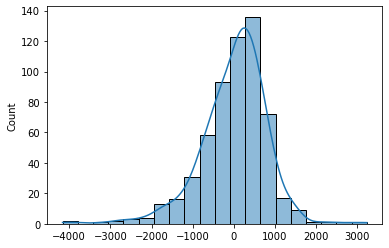

In [41]:
y_train_pred =lr.predict(X_train_constant)

residuals_train =y_train -y_train_pred

sns.histplot(residuals_train,kde=True, bins =20)

In [42]:
"%.3f" % residuals_train.mean()

'-0.000'

In [43]:
residuals_train.std()

803.8664589990401

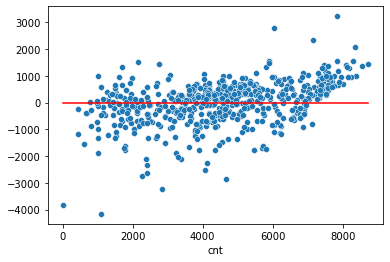

In [81]:
plt.figure()
sns.lineplot(y_train,residuals_train.mean(), color='r')
sns.scatterplot(y_train,residuals_train)
plt.show()

- Based on residual analysis, we can see that the residuals have normality and are centered around the mean
- Also there's no clear pattern in the distribution in the residuals
- The model follows homoscedasticity

### Testing performance on the test data

#### Making all the imputations and changes in the test data

In [44]:
X_test.head()

,holiday,workingday,atemp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_raim,weathersit_mist,year_season_2018_spring,year_season_2018_summer,year_season_2018_winter,year_season_2019_fall,year_season_2019_spring,year_season_2019_summer,year_season_2019_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
634,0,1,30.39875,69.0833,9.000914,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
513,0,1,33.64960,68.4583,19.791800,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
121,0,1,26.64165,73.0000,12.291418,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
373,0,1,12.37395,70.1667,6.626300,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
386,0,0,8.11250,79.6250,13.375746,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
X_test.shape

(146, 31)

In [46]:
# Scaling test data
scale_vars =['atemp','hum','windspeed']

X_test[scale_vars]=scaler.transform(X_test[scale_vars])

In [47]:
# keeping only the columns in the train data

X_test =X_test[final_features]
X_test.shape

(146, 15)

In [48]:
X_test_constant =sm.add_constant(X_test)

y_pred =lr.predict(X_test_constant)

In [50]:
r2_score(y_test,y_pred)

0.8291265107044687

In [53]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

807.6657415034966

### Insight

- R-squared score on the test data is 0.83 and is very similar to the train data
- The model is performing good and also able to generalize well on the test data
- Root Mean Squared Error is also low

### Conclusion

1. We have successfully created a linear regression model to predict demand of bikes with 83% efficiency 
2. We have selected top 15 features to predict the demand of shared bikes
3. The top 3 features are:
    - atemp: The feeling temperature is significantly contributing in the demand and is positively affecting the target
    - Year-season: The derived feature after combining year and season proves to be a very significant variable. The dummy features created from it (year-2019 season-summer, fall and winter) are highly contributing in the demand
    - Weathersit: The weather situation variable also comes out to be useful one. It’s dummy variables light_rain and mist are contributing significantly in the final model
